Данное исследование проводится для интернет-магазина, где необходимо проанализировать и приоритезировать гипотезы, а также провести A/B тестирование, которое позволит в результате увеличить выручку компании.

Основные задачи данного исследования:
1. Приоритизировать гипотезы
2. Запустить A/B-тест
3. Проанализировать результаты A/B-тестирования

# Первый блок: приоритизация гипотез

В первой части исследования нам необходимо приоритизировать гипотезы для дальнейшего увелечения выручки компани.

Импортируем необходимые библиотеки для работы и открываем наши данные:

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
data1.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета.

In [4]:
data1['ICE'] = data1['Impact'] * data1['Confidence'] / data1['Efforts']
data1[["Hypothesis", "ICE"]].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


При использовании этого метода наиболее приоритетными гипотезами будут являться 8, 0 и 7.

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
data1['RICE'] = data1['Reach'] * data1['Impact'] * data1['Confidence'] / data1['Efforts']
data1[["Hypothesis", "RICE"]].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


При использовании метода RICE наиболее приоритетными гипотезами будут являться 7, 2, 0.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Оба метода показали приоритетность гипотез 7, 0 и 6. Что касается гипотез 8 и 2, в зависимости от используемого метода приоритизации, они оказались на более низком месте. Дело в том, что во время подсчета RICE в отличие от ICE, участвует такой параметр, как Reach, то есть  скольких пользователей затронет изменение. При таком раскладе гипотеза 2 затрагивает большее количество людей, что позволило ей стать более приоритетной при использовании метода

# Второй блок: A-B тестирование

Во второй части исследования необходимо проанализировать результаты A-B тестирования по предоставленным нам данным

Откроем датасеты для второго блока, получаем информацию о датасетах, меняем названия заголовков, приводим столбцы к нужному типу:

In [6]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [9]:
orders = pd.read_csv('/datasets/orders.csv')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True)

In [12]:
orders['date'] = pd.to_datetime(orders['date'])

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Создаем массив уникальных пар значений дат и групп теста, а затем агрегиурем значения

In [13]:
orders.drop_duplicates()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [14]:
orders['visitor_id'].nunique()

1031

In [15]:
users_in_two_groups = set(orders[orders['group'] == 'A']['visitor_id']) & set(orders[orders['group'] == 'B']['visitor_id'])
len(users_in_two_groups)

58

58 пользователей участвуют в обоих группах исследования, что составляет около 5% от всех пользователей, принимавших участие в исследовании. В данном случае, мы удалим таких пользователей, чтобы они не искажали результаты.

In [16]:
orders = orders[orders.visitor_id.isin(users_in_two_groups) == False]
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [17]:
datesGroups = orders[['date','group']].drop_duplicates() 

In [18]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
ordersAggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [20]:
ordersAggregated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 55 to 930
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            62 non-null     datetime64[ns]
 1   group           62 non-null     object        
 2   transaction_id  62 non-null     int64         
 3   visitor_id      62 non-null     int64         
 4   revenue         62 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.9+ KB


In [21]:
ordersAggregated.drop_duplicates()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [22]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [23]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


Text(0, 0.5, 'Выручка')

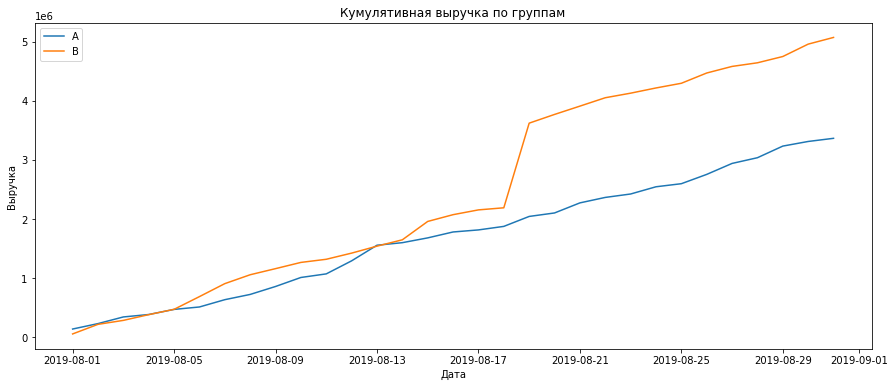

In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]

plt.figure(figsize=(15, 6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.title("Кумулятивная выручка по группам")
plt.xlabel("Дата") 
plt.ylabel("Выручка")

Выручка увеличивается со временем теста, однако в группе B заметен резкий рост, что может сказать о выбросах в данных. Пока что по кумулятивной выручке без удаления выбросов лидирует группа B

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Text(0, 0.5, 'Средний чек')

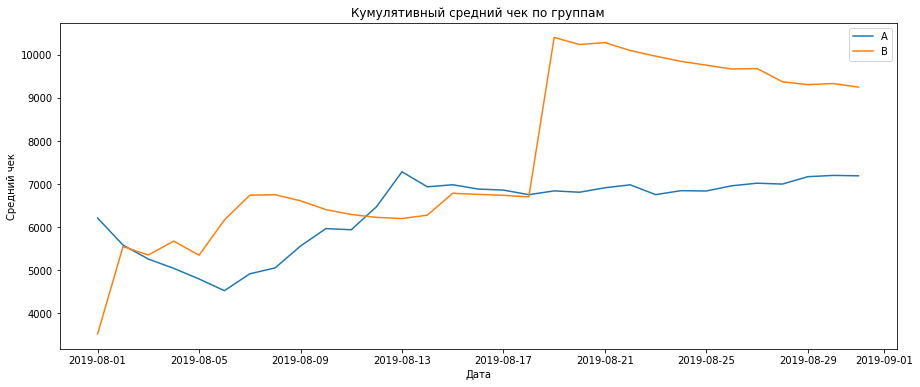

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("Кумулятивный средний чек по группам")
plt.xlabel("Дата") 
plt.ylabel("Средний чек")

Резкий скачок среднего чека в группе также говорит о выбросах, в общем средний чек по группе B лидирует.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Text(0, 0.5, 'Изменение')

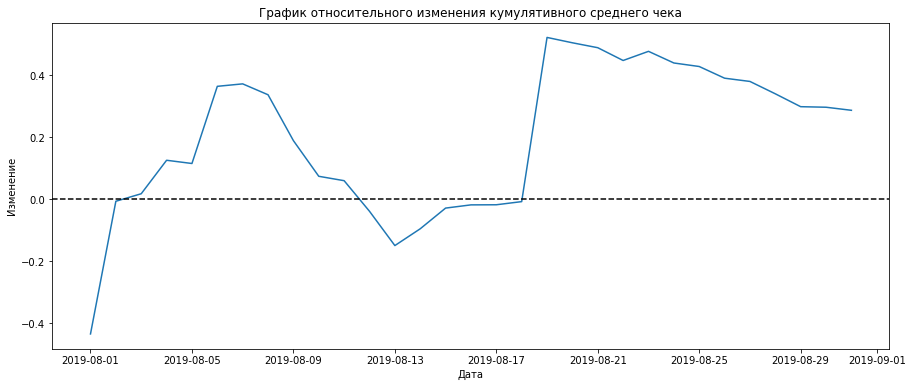

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("График относительного изменения кумулятивного среднего чека")
plt.xlabel("Дата") 
plt.ylabel("Изменение")

График изменения нестабильный, есть резкие скачки, что также говорит о выбросах в данных.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

Text(0, 0.5, 'Среднее количество заказов')

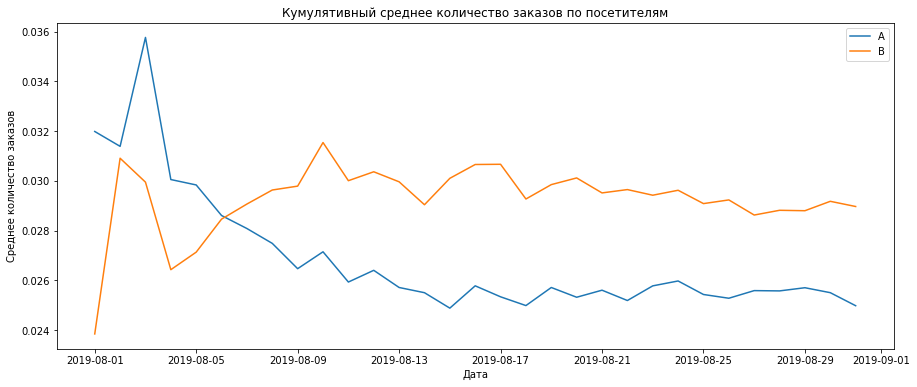

In [27]:
plt.figure(figsize=(15, 6))
plt.plot(mergedCumulativeRevenue['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(mergedCumulativeRevenue['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
plt.legend() 
plt.title("Кумулятивный среднее количество заказов по посетителям")
plt.xlabel("Дата") 
plt.ylabel("Среднее количество заказов")

Среднее количество заказов на пользователя больше у группы B, однако в начле теста в группе A и B был сильный скачок, а затем спад. Среднее значение может быть искажено слишком большими заказами.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

In [28]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head(5)

,date,revenueA,ordersA,visitorsA,revenueB,ordersB,visitorsB
0,2019-08-01,142779,23,719,59758,17,713
1,2019-08-02,234381,42,1338,221801,40,1294
2,2019-08-03,346854,66,1845,288850,54,1803
3,2019-08-04,388030,77,2562,385740,68,2573
4,2019-08-05,474413,99,3318,475648,89,3280


Text(0, 0.5, 'Изменение')

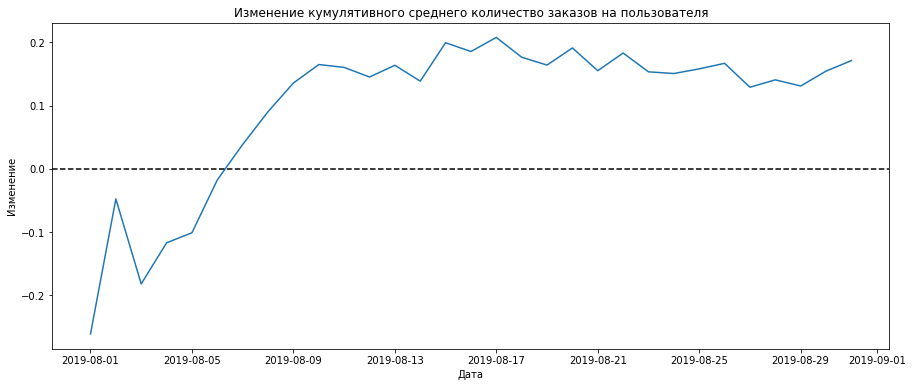

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsB'])-1)
plt.axhline(y=0, color='black', linestyle='--') 

plt.title("Изменение кумулятивного среднего количество заказов на пользователя")
plt.xlabel("Дата") 
plt.ylabel("Изменение")


Прсле нескольких дней исследования группа B значительно вырвалась вперед и сохраняла первенство до конца исследования. Надо будет удалить выбросы для того, чтобы понять, какая группа дейсвтительно эффективнее.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [30]:
ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
ordersByUsers.columns = ['visitor_id', 'orders']

Text(0.5, 1.0, 'Количество заказов')

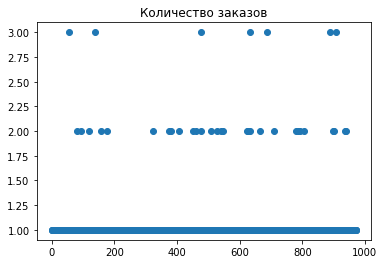

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title("Количество заказов")

Чаще всего пользователи делали не более одного заказа, есть много тех, кто совершил два заказа. Есть и пользователи, который совершили аномально много заказов, например 10 и выше.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [32]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 1% пользователей оформляли больше, чем 4 заказа, а не более 5% больше, чем 2 заказа. В идеале не удалять больше 5% данных, поэтому можно установить вехнюю границу числа заказов в 3 единицы, а все что выше считать уже аномальным.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Text(0.5, 1.0, 'Стоимость заказов')

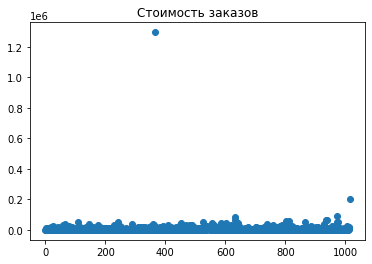

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title("Стоимость заказов")

Есть выбросы со стоимостью заказов больше, чем 120000, основная часть заказов стоимостью до 15.000

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [34]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Не более 5% заказов дороже 28.000. Можно установить верхнюю границу в 30.000

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Пподготовим данные для того, чтобы сравнить выборки по тесту Уилкоксона-Манна-Уитни

In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))
ordersByUsersB.columns = ['visitor_id', 'orders'] 

In [36]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(mergedCumulativeRevenue['visitorsA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(mergedCumulativeRevenue['visitorsB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Сформулируем гипотезы:

Нулевая: различий в среднем количестве заказов между группами нет

Альтернативная: различия в среднем количестве заказов между группами есть

In [37]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.010
0.166


P-уровень значимости меньше, чем 0.05, значит мы отвергаем гипотезу о том, что статистичеки значимых различий нет. 
Относительный проигрыш группы A по сырым данным равен 14.4 процента

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы: 

Нулевая: различий в среднем чеке заказа между группами нет

Альтернативная: различия в в среднем чеке заказа между группами есть

In [38]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


P-уровень значимости больше, чем 0.05, а значит мы не можем отрицать нулевую гипотезу, между выборками нет статистических различий, хотя относительный проигрыш группы составляет 25,9 процентов по сырым данным.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Для начала очистим все выбросы в данных. Ранее мы установили, что нормальная в данном исследовании стоимость заказа составляет до 30000, а число заказов до 3 включительно.

In [39]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'],
    ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],], axis=0,)
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

In [40]:
abnormalUsers.head(5)

568     113298937
1099    148427295
461     154576532
928     204675465
684     358944393
Name: visitor_id, dtype: int64

In [41]:
abnormalUsers.shape[0]

70

После преобразований 90 пользователей мы не будем учитывать про анализе результатов.

Добавим необхолимые столбцы и соберем все в одну таблицу, а затем избавимся от аномальных значений

In [42]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [43]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),name='orders',),],axis=0,)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,) 

Сформулируем гипотезы:

Нулевая: различий в среднем количестве заказов между группами нет

Альтернативная: различия в среднем количестве заказов между группами есть

In [44]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.017
0.162


Изменения после очищения данных не столь значительны, также есть статистическое различие между выборками, относительный проигрыш первой группы равен 15,3%

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:

Нулевая: различий в среднем чеке заказа между группами нет

Альтернативная: различия в в среднем чеке заказа между группами есть

In [45]:
print('{0:.3f}'.format(
        stats.mannwhitneyu(orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )]['revenue'],)[1]))

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(orders['group'] == 'A',
np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'].mean()- 1)) 

0.845
-0.042


P-уровень значимости остался на том же уровне, несмотря на удаление выбросов, статистическое различие между группами составляет 4%.

### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

На данном этапе исследования у нас имеются следующие факты:
- По сырым данным есть статистические различия в среднем количестве заказов на посетителей, по очищенным данным также есть статистическая разница. 

- Что касается среднего чека, между выборками нет статистических различий в обоих случаях, есть небольшая статистическая разница по сегментам

По имеющимся данным лучше продолжить тест, так как сейчас нельзя однозначно зафиксировать победу одной из групп или же отсутствие различий.

# Вывод

Данное исследование проводилось для интернет-магазина, где необходимо проанализировать и приоритезировать гипотезы, а также проанализировать результаты A/B тестирования.

Основные задачи данного исследования:

- Приоритизировать гипотезы
- Запустить A/B-тест
- Проанализировать результаты A/B-тестирования

В результате приоритизации гипотез самыми значимыми были выбраны 7 (Добавить форму подписки на все основные страницы), 2 (Добавить блоки рекомендаций товаров) и 0 (Добавить два новых канала привлечения трафика).


При анализе AB-тестирования результаты были следующие
Практически все графики показывали лидерство группы B практически по всем параметрам, однако резкие подъемы и спады свидетельствовали о выбросах в данных. После их устранения, полученные выборки были проверены по тесту Уилкоксона-Манна-Уитни.

На данном этапе исследования у нас имеются следующие факты:
- По сырым данным есть статистические различия в среднем количестве заказов на посетителей, по очищенным данным также есть статистическая разница. 

- Что касается среднего чека, между выборками нет статистических различий в обоих случаях, есть небольшая статистическая ращница по сегментам

По имеющимся данным лучше продолжить тест, так как сейчас нельзя однозначно зафиксировать победу одной из групп или же отсутствие различий.